# Step 1. Import Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# cara 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# cara 2
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# EDA 1 (Multivariate Analysis)


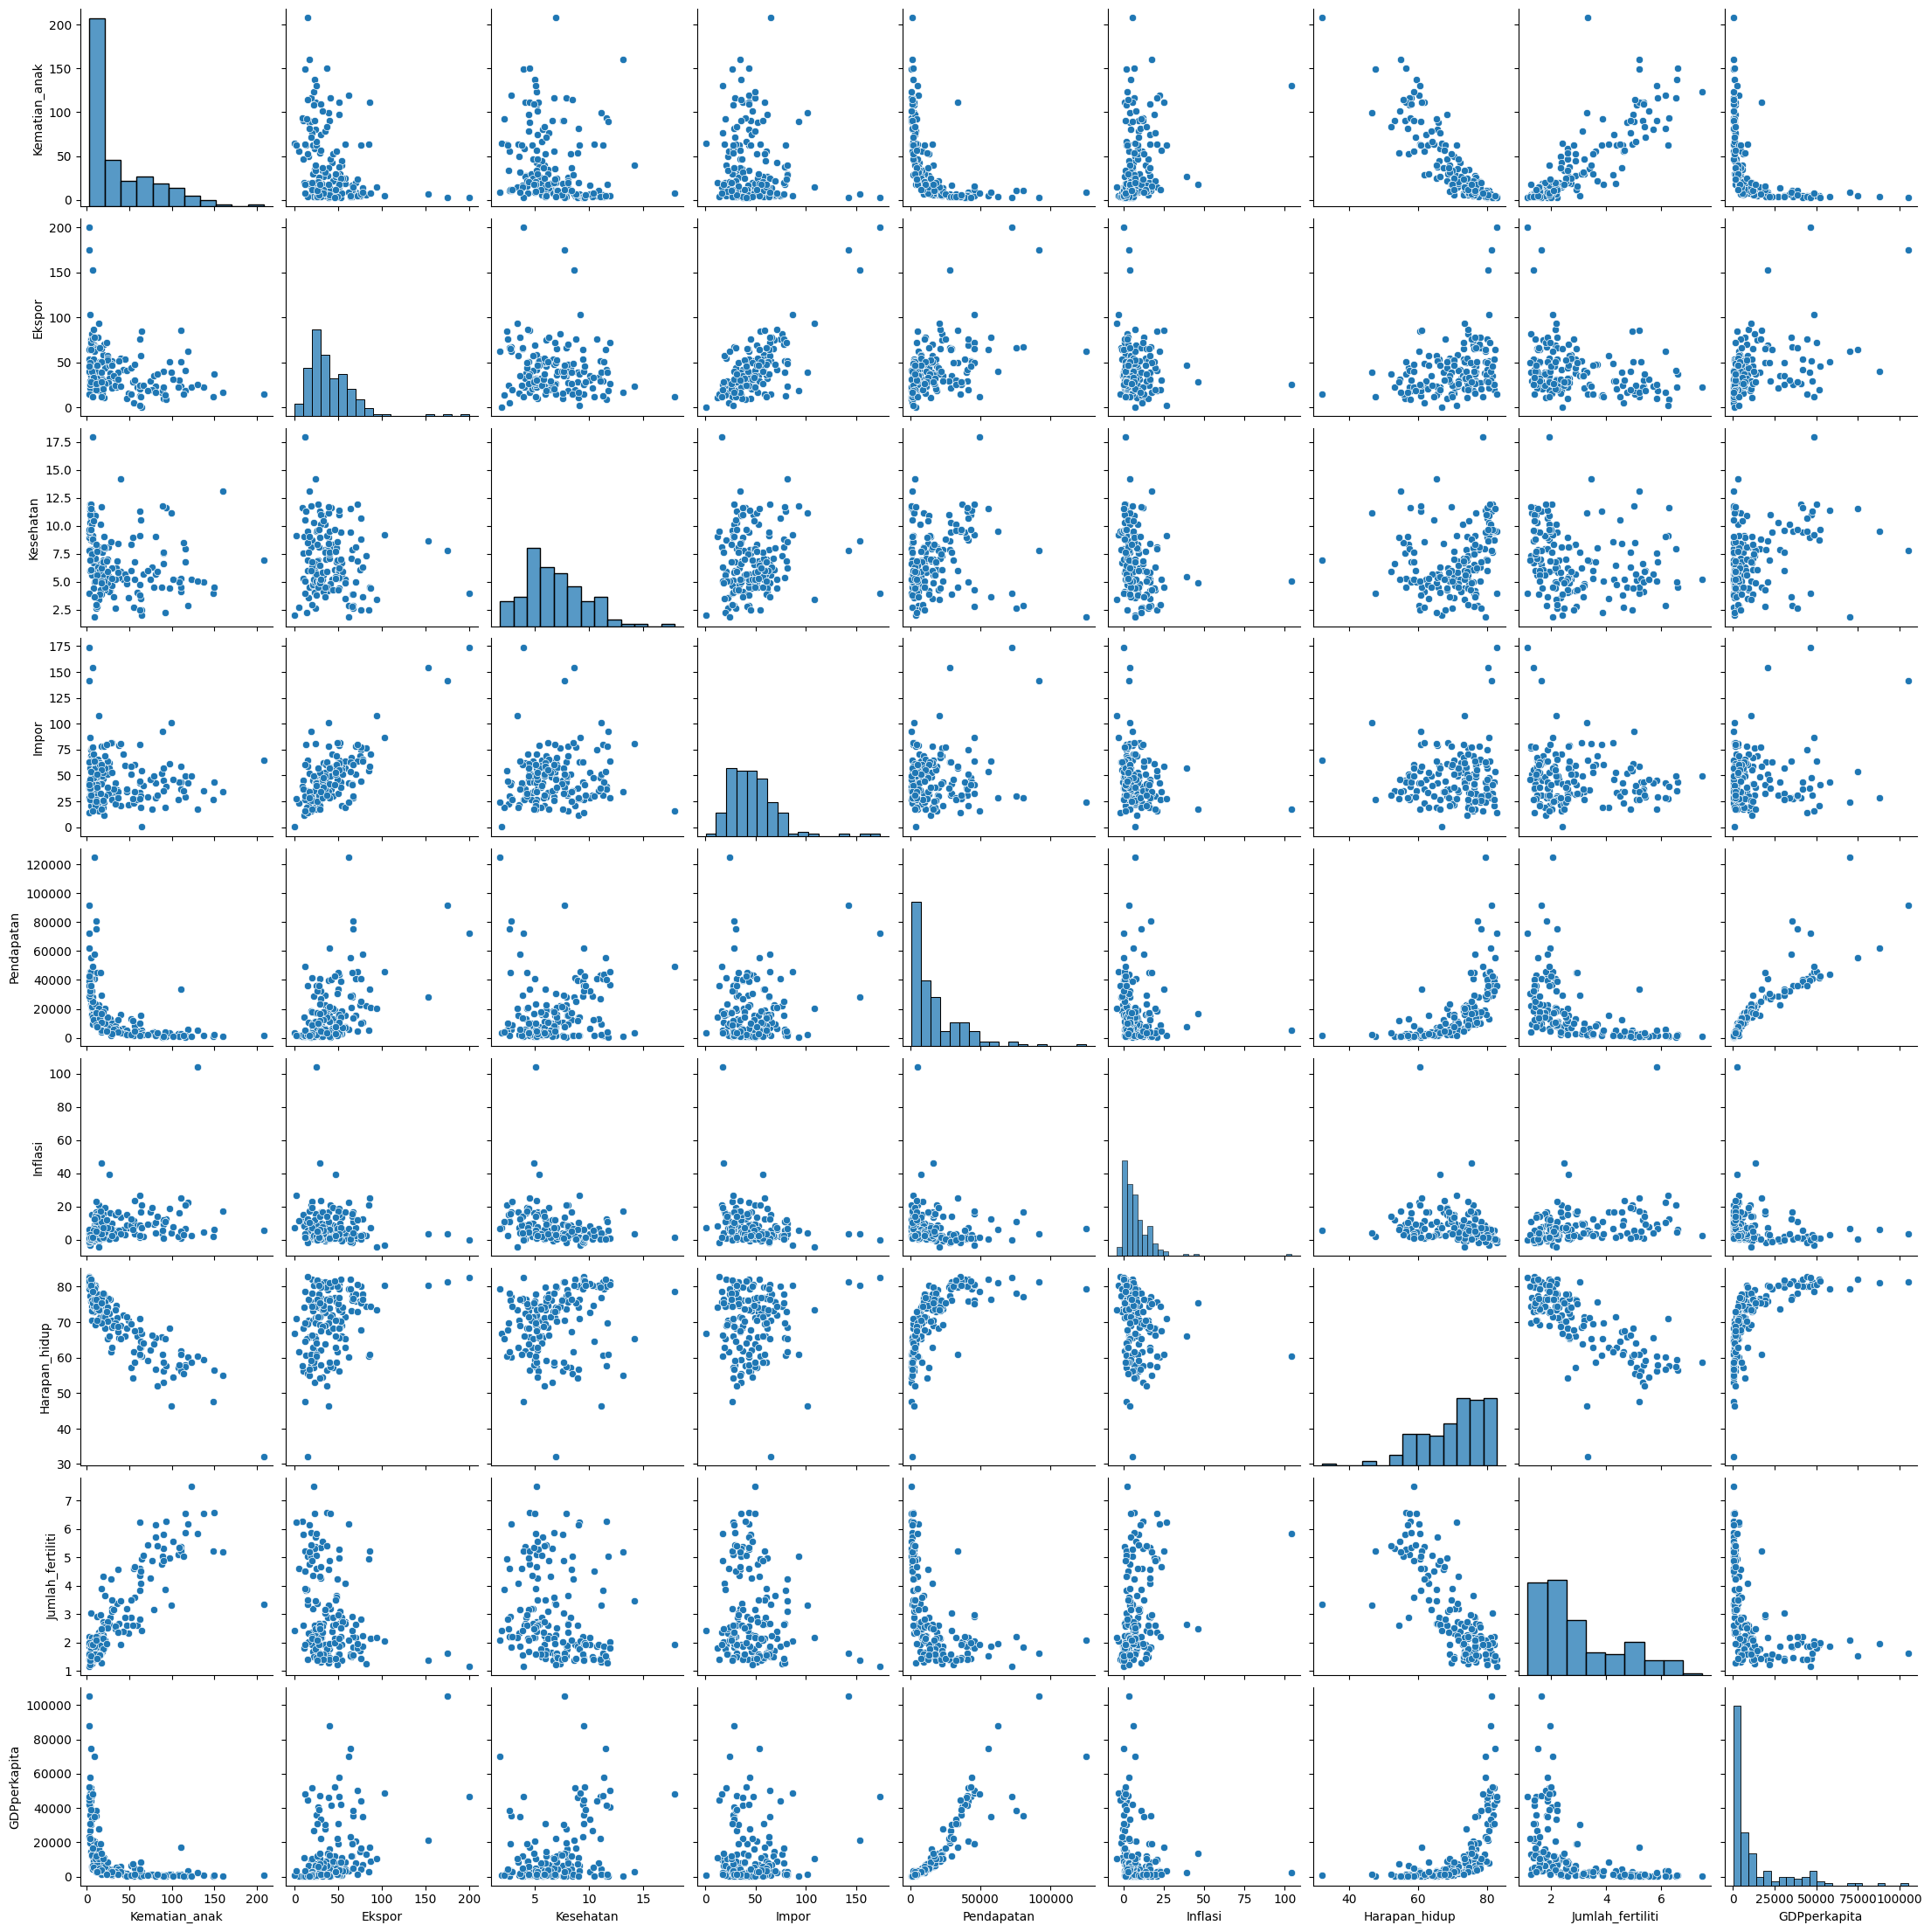

In [5]:
sns.pairplot(df, diag_kind='hist');
plt.show()

<AxesSubplot:>

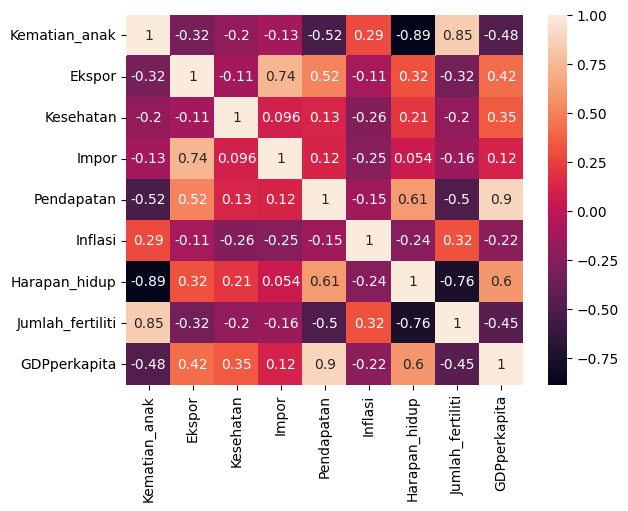

In [6]:
sns.heatmap(df.corr(), annot=True, fmt='.2g')

# Data Cleaning

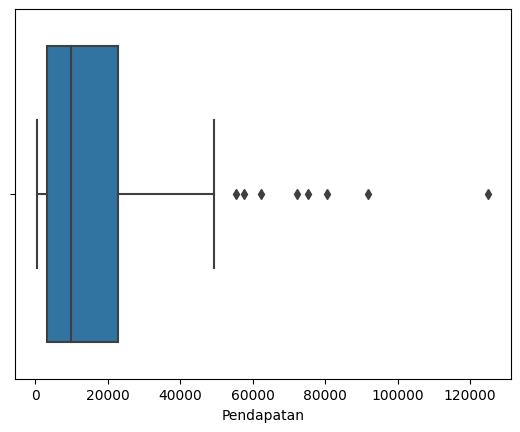

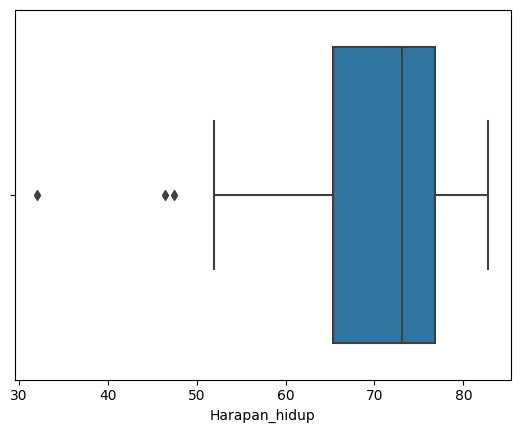

In [7]:
sns.boxplot(x='Pendapatan', data=df)
plt.show()
sns.boxplot(x='Harapan_hidup', data=df)
plt.show()

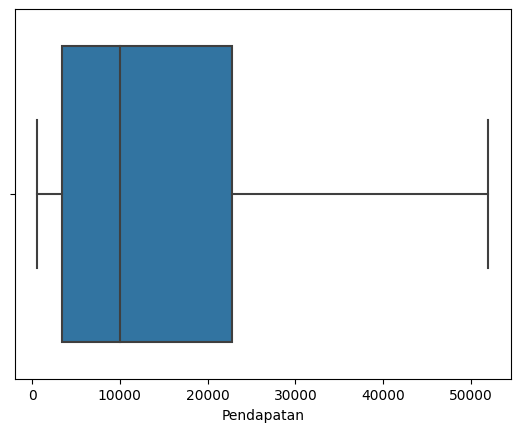

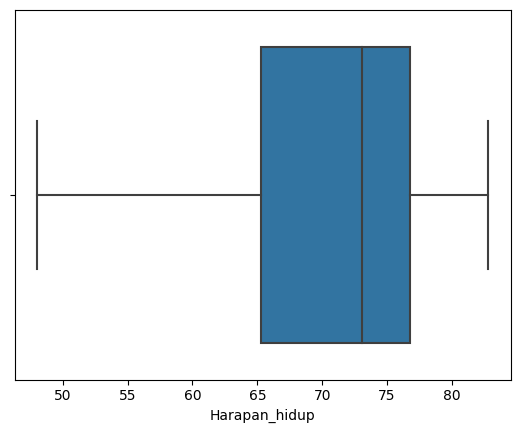

In [8]:
# handle outlier
def handle_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    df_handled = df.copy()
    df_handled = df_handled.clip(lower=lb, upper=ub, axis=1)
    return df_handled

df_outlier_handled = handle_outlier_IQR(df[['Pendapatan', 'Harapan_hidup']])

sns.boxplot(x='Pendapatan', data=df_outlier_handled)
plt.show()
sns.boxplot(x='Harapan_hidup', data=df_outlier_handled)
plt.show()

# Univariate

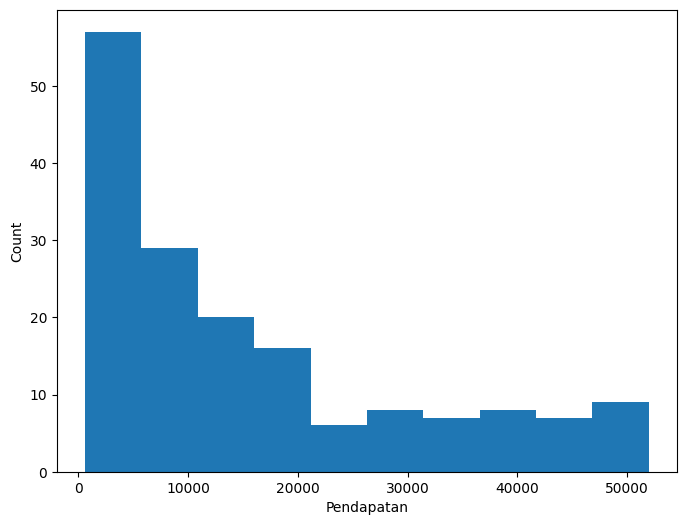

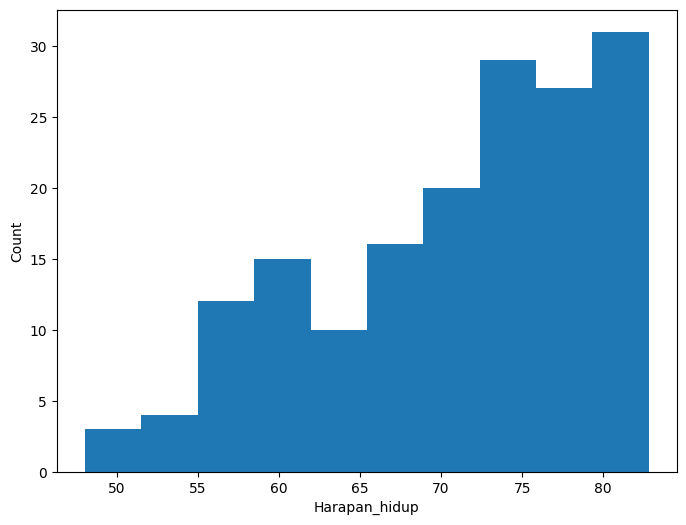

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df_outlier_handled['Pendapatan'], bins=10)
plt.xlabel('Pendapatan')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df_outlier_handled['Harapan_hidup'], bins=10)
plt.xlabel('Harapan_hidup')
plt.ylabel('Count')
plt.show()

# Bivariate

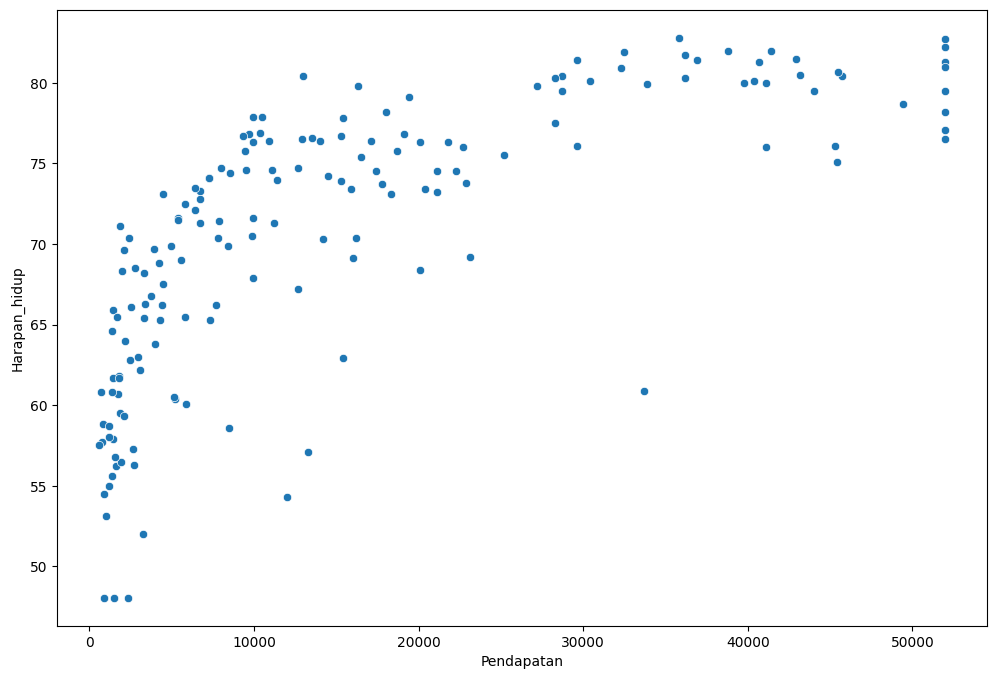

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_outlier_handled, x='Pendapatan', y='Harapan_hidup')
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

# Clustering

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_handled.astype(float))

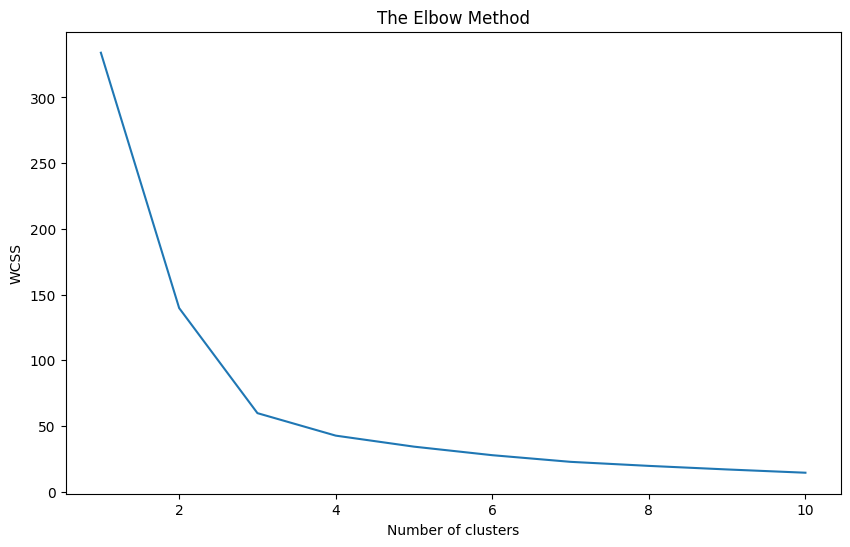

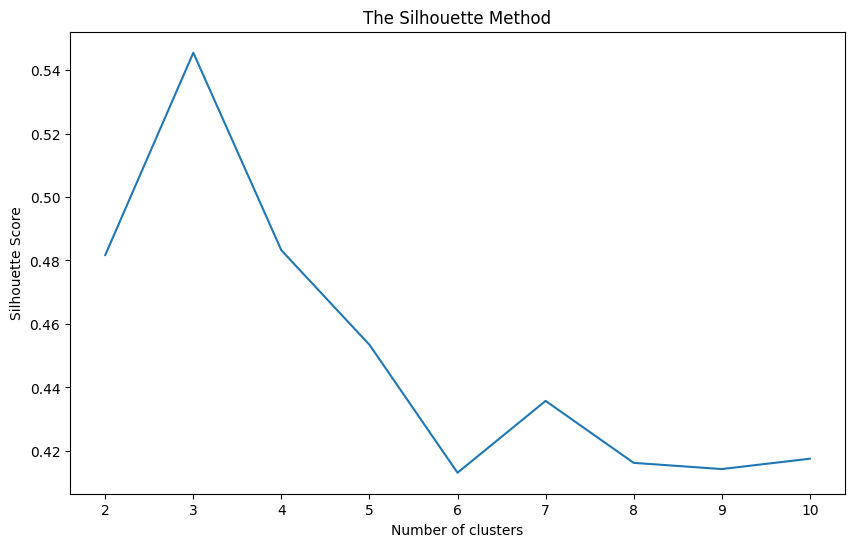

In [12]:
# Clustering with Elbow
from sklearn.cluster import KMeans
    
plt.figure(figsize=(10,6))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(dfoutlier_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette
from sklearn.metrics import silhouette_score

plt.figure(figsize=(10, 6))
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
    kmeans.fit(dfoutlier_std)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(dfoutlier_std, labels, metric = 'euclidean')
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

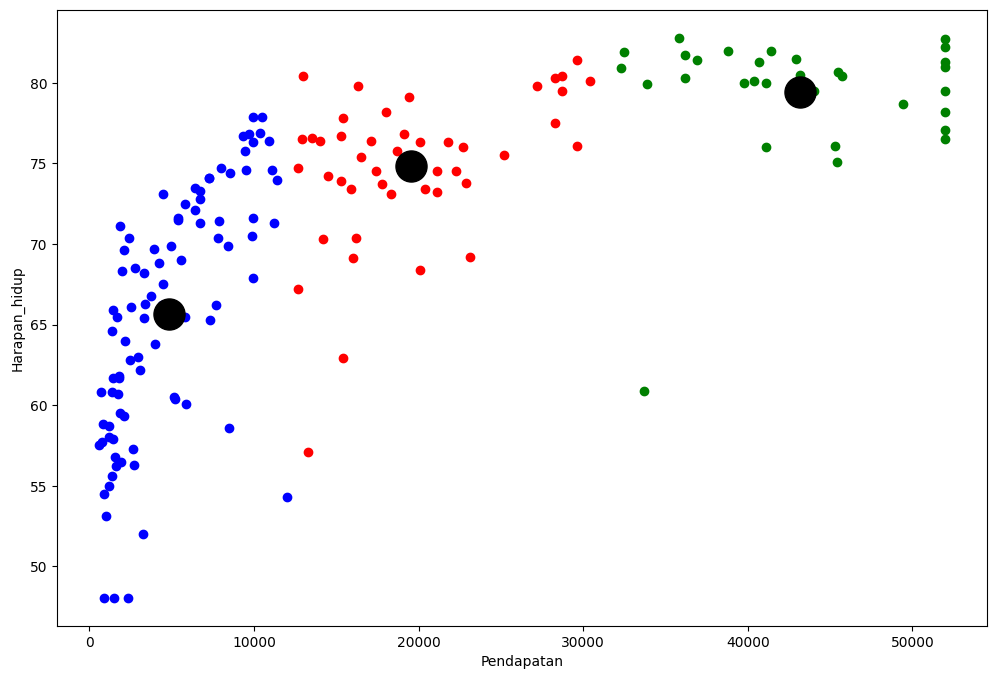

In [14]:
# Clustering
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_outlier_handled)
labels2 = kmeans2.labels_

new_dfoutlier = pd.DataFrame(data=df_outlier_handled, columns=['Pendapatan', 'Harapan_hidup'])
new_dfoutlier['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans2 == 0], new_dfoutlier.Harapan_hidup[new_dfoutlier.label_kmeans2==0], c='blue')
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans2 == 1], new_dfoutlier.Harapan_hidup[new_dfoutlier.label_kmeans2==1], c='red')
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans2 == 2], new_dfoutlier.Harapan_hidup[new_dfoutlier.label_kmeans2==2], c='green')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, label='Cluster Centers')
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

In [15]:
new_dfoutlier['Negara']=df['Negara']
new_dfoutlier['Cluster'] = labels2
    
cluster_0_indices = new_dfoutlier.index[new_dfoutlier.label_kmeans2 == 0]

print("Countries in Cluster 0 (Blue):")
for i, index in enumerate(cluster_0_indices):
    if i == len(cluster_0_indices) - 1:
        print(new_dfoutlier['Negara'][index])
    else:
        print(new_dfoutlier['Negara'][index], end=", ")
        
count_cluster_0 = len(new_dfoutlier[new_dfoutlier.label_kmeans2 == 0])
print('Total ada', count_cluster_0, 'negara di cluster 0')

Countries in Cluster 0 (Blue):
Afghanistan, Albania, Angola, Armenia, Bangladesh, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Burkina Faso, Burundi, Cambodia, Cameroon, Cape Verde, Central African Republic, Chad, China, Colombia, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Dominican Republic, Ecuador, Egypt, El Salvador, Eritrea, Fiji, Gambia, Georgia, Ghana, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, India, Indonesia, Jamaica, Jordan, Kenya, Kiribati, Kyrgyz Republic, Lao, Lesotho, Liberia, Macedonia, FYR, Madagascar, Malawi, Maldives, Mali, Mauritania, Micronesia, Fed. Sts., Moldova, Mongolia, Morocco, Mozambique, Myanmar, Namibia, Nepal, Niger, Nigeria, Pakistan, Paraguay, Peru, Philippines, Rwanda, Samoa, Senegal, Sierra Leone, Solomon Islands, South Africa, Sri Lanka, St. Vincent and the Grenadines, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Tonga, Tunisia, Turkmenistan, Uganda, Ukraine, Uzbekistan, Vanuatu, Vietnam, Yemen, Zambia
Total a

In [16]:
sorted_indices = cluster_0_indices[new_dfoutlier.loc[cluster_0_indices, 'Pendapatan'].argsort()]
sorted_indices = sorted_indices[new_dfoutlier.loc[sorted_indices, 'Harapan_hidup'].argsort(kind='mergesort')]

top_3_countries = new_dfoutlier['Negara'][sorted_indices[:3]].tolist()
top_3_pendapatan = new_dfoutlier.loc[sorted_indices[:3], 'Pendapatan'].tolist()
top_3_harapan_hidup = new_dfoutlier.loc[sorted_indices[:3], 'Harapan_hidup'].tolist()

print("Top 3 Countries in Cluster 2 dengan Pendapatan dan Harapan_hidup terendah")
print(top_3_countries)

# Detail
print("Top 3 Countries in Cluster 2 dengan Pendapatan dan Harapan_hidup terendah")
for i in range(3):
    print(f"Country: {top_3_countries[i]}")
    print(f"Pendapatan: {top_3_pendapatan[i]}")
    print(f"Harapan_hidup: {top_3_harapan_hidup[i]}")
    print()

Top 3 Countries in Cluster 2 dengan Pendapatan dan Harapan_hidup terendah
['Central African Republic', 'Haiti', 'Lesotho']
Top 3 Countries in Cluster 2 dengan Pendapatan dan Harapan_hidup terendah
Country: Central African Republic
Pendapatan: 888.0
Harapan_hidup: 48.05

Country: Haiti
Pendapatan: 1500.0
Harapan_hidup: 48.05

Country: Lesotho
Pendapatan: 2380.0
Harapan_hidup: 48.05



# Bonus: Tried Using PCA

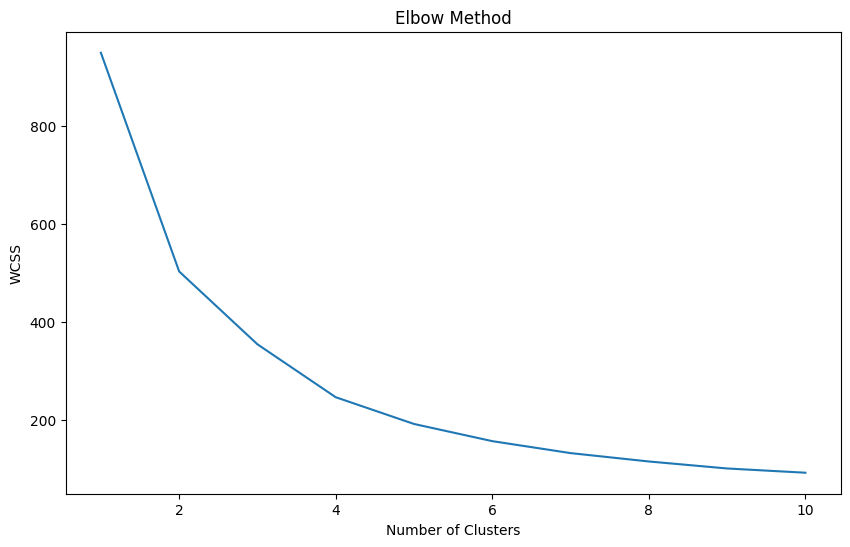

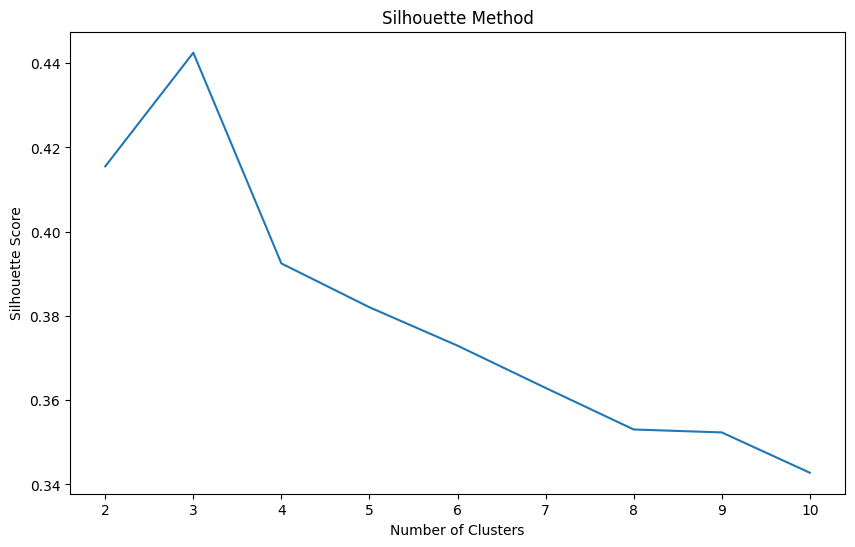

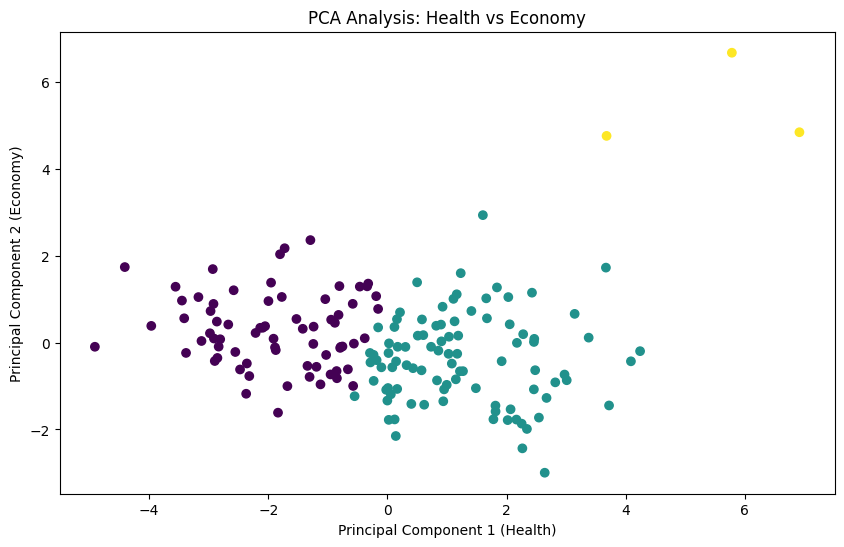

Loadings (Coefficients) of Variables on Principal Components:
                       Kematian_anak  Kesehatan  Harapan_hidup  \
Principal_Component_1      -0.419519   0.150838       0.425839   
Principal_Component_2       0.192884  -0.243087      -0.222707   

                       Jumlah_fertiliti    Ekspor     Impor  Pendapatan  \
Principal_Component_1         -0.403729  0.283897  0.161482    0.398441   
Principal_Component_2          0.155233  0.613163  0.671821    0.022536   

                        Inflasi  GDPperkapita  
Principal_Component_1 -0.193173      0.392645  
Principal_Component_2 -0.008404     -0.046022  
Cluster 0:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Membaca data dari file CSV
# data = pd.read_csv("nama_file.csv")

# Memilih kolom-kolom berkaitan dengan kesehatan dan ekonomi
kesehatan_columns = ['Kematian_anak', 'Kesehatan', 'Harapan_hidup', 'Jumlah_fertiliti']
ekonomi_columns = ['Ekspor', 'Impor', 'Pendapatan', 'Inflasi', 'GDPperkapita']

# Menggabungkan data dari kedua kategori
data_selected = pd.concat([data[kesehatan_columns], data[ekonomi_columns]], axis=1)

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Menerapkan PCA dengan 2 komponen utama
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Membuat DataFrame baru dari data PCA
pca_df = pd.DataFrame(data_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(pca_df)

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal_Component_1'], pca_df['Principal_Component_2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1 (Health)')
plt.ylabel('Principal Component 2 (Economy)')
plt.title('PCA Analysis: Health vs Economy')
plt.show()

# Mendapatkan matriks koefisien beban dari variabel asli terhadap komponen utama
loadings = pca.components_

# Membuat DataFrame untuk menampilkan koefisien beban
loadings_df = pd.DataFrame(loadings, columns=data_selected.columns, index=['Principal_Component_1', 'Principal_Component_2'])

# Menampilkan DataFrame koefisien beban
print("Loadings (Coefficients) of Variables on Principal Components:")
print(loadings_df)

# Menambahkan kolom 'Cluster' ke DataFrame
data['Cluster'] = labels

# Mengelompokkan negara berdasarkan kluster
cluster_groups = data.groupby('Cluster')['Negara'].apply(list)

# Menampilkan nama-nama negara dalam setiap kluster
for cluster, countries in cluster_groups.items():
    print(f"Cluster {cluster}:")
    print(countries)
    print()